<a href="https://colab.research.google.com/github/326-YL/403-Fall-2022/blob/main/Copy_of_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 7 Cart-pole Dynamics Simulation**

The goal of HW 7 is to create a dynamics simulation of a cart-pole system described in the figure below. 

<img src="https://github.com/DARoSLab/CS403-Intro-Robotics/blob/main/hws/hw7/cart-pole.png?raw=true" width="450">

Use a generalized coordinate given in the figure. We give forward kinematics of important places of the system. 

\begin{align}
rA= \begin{pmatrix}
    x \\
    0 \\
    0
     \end{pmatrix},  &
\ rB = \begin{pmatrix}
    x + ccos(\theta)  \\
    csin(\theta) \\
    \theta
     \end{pmatrix} 
\\[10pt]
\implies vA= \begin{pmatrix}
    \dot{x} \\
    0 \\
    0
     \end{pmatrix}, &
\ vB = \begin{pmatrix}
    \dot{x} -c\dot{\theta}sin(\theta)  \\
    c\dot{\theta}cos(\theta) \\
    \dot{\theta}
     \end{pmatrix}
\\[10pt]
\implies aA= \begin{pmatrix}
    \ddot{x} \\
    0 \\
    0
     \end{pmatrix}, &
\ aB = \begin{pmatrix}
    \ddot{x} -c\ddot{\theta}sin(\theta)-c\dot{\theta}^2cos(\theta)  \\
    c\ddot{\theta}cos(\theta) - c\dot{\theta}^2sin(\theta) \\
    \ddot{\theta}
     \end{pmatrix}
\\[10pt]
\end{align}

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
import time 
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# **Q.1 Dynamics of a cart-pole system**

To make a dynamics simulation, we first need to complete the formula: 

$M \ddot{q} + b (q, \dot{q}) + g(q) = \begin{pmatrix} f \\ \tau \end{pmatrix} $.

Identify $M$, $b$, and $g$. Similar systems are used in the lecture and practice set. Please refer those. 


# Q.1.(a) [20 pts] Dynamics function 
Based on the given template code, complete the function returning the acceleration of the generalized coordinate: 

$\ddot{q} = \begin{pmatrix}
\ddot{x} \\ \ddot{\theta}
\end{pmatrix} = M^{-1}\left( u - b -g \right)$ 


In [6]:
def dynamics(q, u, params):
  m1, m2, I2, c, g = params
  x, th, xdot, thdot  = q.tolist()
  print(th)
  print(q[1])
  
  # Fill your code: define b (coriolis and centripetal), g (gravitational force), and M (mass matrix)
  b =np.array([-m2*c*thdot*thdot*np.cos(th),0]).T
  g =np.array([0,m2*g*c*np.cos(th)]).T
  M =np.array([[m1+m2,-m2*c*np.sin(th)],[-m2*c*np.sin(th),I2+m2*c*c]])
  qddot =np.linalg.inv(M)@(u-b-g)
  print(f"qddot:{qddot}")
  return qddot

In [17]:
# Test function: No need to change
def test_dynamics():
  m1 = 0.5
  m2 = 0.5
  I2 = 1
  c = 0.2
  g = 9.81
  dt = 0.005
  tf = 10.0
  params = [m1, m2, I2, c, g]
  test_cases = np.array([[0.0, np.pi/4, 0.0, 0.0],
                [0.5, -np.pi/4, 0.0, 0.0],
                [0.0, 0, 0.5, 0.0],
                [0.0, 0, 0.0, 5],
                ])
  soln = np.array([[-0.04832512, -0.68342045],
                   [ 0.04832512, -0.68342045],
                   [ 0.,         -0.96176471],
                   [ 2.5,        -0.96176471]])
  u = np.array([0, 0])
  res = np.zeros((4, 2))
  for i, q in enumerate(test_cases):
    #print(q)
    res[i, :] = dynamics(q, u, params)
  assert np.allclose(res, soln), f"your dynamics implementation is not correct: your result {res} != solution: \n {soln}"
  print('Your implementation is correct!!')

In [18]:
test_dynamics()

0.7853981633974483
0.7853981633974483
qddot:[-0.04832512 -0.68342045]
-0.7853981633974483
-0.7853981633974483
qddot:[ 0.04832512 -0.68342045]
0.0
0.0
qddot:[ 0.         -0.96176471]
0.0
0.0
qddot:[ 2.5        -0.96176471]
Your implementation is correct!!


# Q 1.1.(b) [15 pts] Dynamics simulation 

Complete the following function that finds state trajectory by using dynamics function we found in Q.1.1.(a). 

In [11]:
def simulate_cartpole(x0, params, tf=1.0, dt=0.01):
  m1, m2, I2, c, g = params
  num_step = int(np.floor(tf/dt));
  tspan = np.linspace(0, tf, num_step); 
  x_out = np.zeros((4,num_step));
  print(f"x_out:{x_out}")
  x_out[:,0] = x0;

  for i in range(num_step-1):
      u = np.zeros(2).T # put zero since there is no motor input for Q.1.

      # Fill your code: update the sequence of state (x_out) by utilizing the dynamcs function
      # Hint: use semi-implicit Euler integration
      #q=q+q_dot*dt

      q_ddot=dynamics(x_out[:,i],u,params)
      x_ddot=q_ddot[0]
      x_dot=x_out[:,i][2]+x_ddot*dt
      x=x_out[:,i][0]+x_dot*dt

      th_ddot=q_ddot[1]
      th_dot=x_out[:,i][3]+th_ddot*dt
      th=x_out[:,i][1]+th_dot*dt

      # [x,th,xdot,thdot]
      q_out=np.array([x,th,x_dot,th_dot]).T
      x_out[:,i+1]=q_out



    
  return x_out

In [12]:
# Use the given parameters: No need to change
m1 = 0.5
m2 = 0.5
I2 = 1
c = 0.2
g = 9.81
dt = 0.005
tf = 10.0
params = [m1, m2, I2, c, g]



In [13]:
# Cart-Pole visualization function: No need to change
def visualize_cartpole(q_hist, params=[0.4, 0.4, 0.01], num_frames=100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)   
  c_l, p_l, dt = params
  cart, = ax.plot([-0.5*c_l, 0.5*c_l], [0, 0], 'b', lw=10)
  pole, = ax.plot([0, 0], [0, p_l], 'r', lw=10)
  
  txt_title = ax.set_title('')
  
  ax.set_xlim(( -1, 1))            
  ax.set_ylim((-0.7, 1.3))
  txt_title = ax.set_title('')
  interval = len(q_hist)//num_frames
  def drawFrame(k):
    k = interval*k
    x, theta = q_hist[k]

    rA = [x, 0]
    rC = [x + p_l*np.cos(theta), p_l*np.sin(theta)]
    cart.set_data([x-0.5*c_l, x+0.5*c_l], [0, 0])
    pole.set_data([rA[0], rC[0]], [rA[1], rC[1]])
    txt_title.set_text(f't = {dt*k:.2f} sec')
    return cart, pole
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim


In [19]:
# Simulation and animation code: No need to change
x0 = np.array([0.0, np.pi/4, 0.0, 0.0]).T;
x_out = simulate_cartpole(x0, params, tf=tf, dt=dt)
anim = visualize_cartpole(x_out[:2, :].T, num_frames=50)
plt.close()
HTML(anim.to_html5_video())

Streaming output truncated to the last 5000 lines.
-0.27601761544480063
qddot:[ 0.20619002 -0.93086938]
-0.28289535718348147
-0.28289535718348147
qddot:[ 0.20763025 -0.92921786]
-0.2897963293687097
-0.2897963293687097
qddot:[ 0.20905496 -0.92751789]
-0.2967204895012126
-0.2967204895012126
qddot:[ 0.21046362 -0.92576907]
-0.30366779386054543
-0.30366779386054543
qddot:[ 0.21185569 -0.92397102]
-0.3106381974952867
-0.3106381974952867
qddot:[ 0.21323066 -0.92212333]
-0.31763165421328415
-0.31763165421328415
qddot:[ 0.21458797 -0.92022563]
-0.32464811657195414
-0.32464811657195414
qddot:[ 0.2159271  -0.91827752]
-0.33168753586863775
-0.33168753586863775
qddot:[ 0.2172475  -0.91627863]
-0.33874986213101665
-0.33874986213101665
qddot:[ 0.21854863 -0.91422857]
-0.34583504410759197
-0.34583504410759197
qddot:[ 0.21982994 -0.91212696]
-0.35294302925822935
-0.35294302925822935
qddot:[ 0.22109087 -0.90997344]
-0.3600737637447734
-0.3600737637447734
qddot:[ 0.22233088 -0.90776762]
-0.3672271924217

# Q.1.(c) [15 pts] Kinetic and Potential Energy

Plot the kinetic, potential, and total energy of the system. 

Hint: use the equation, $T = \frac{1}{2} \dot{q}^{\top}M\dot{q}$, for kinetic energy computation.

In [34]:
from pyparsing.helpers import quoted_string
def kinetic_energy(q, params):
  m1, m2, I2, c, g = params


  # Fill your code: complete the function return the profile of kinetic energy
  x, th, xdot, thdot  = q.tolist()
  #get M
  M=np.array([[m1+m1,m2*c*np.cos(th)],[m2*c*np.cos(th),I2+m2*c*c]])
  #get q_dot
  q_dot=np.array([xdot,thdot]).T

  T =1/2*q_dot.T@M@q_dot

  return T

def potential_energy(q, params):
  m1, m2, I2, c, g = params

  # Fill your code: complete the function return the profile of kinetic energy
  x, th, xdot, thdot  = q.tolist()
  #get h first-->rb * (-g^). (-g^)=(0,1,0)
  h=np.array([x+c*np.cos(th),c*np.sin(th),th])@np.array([0,1,0]).T

  P =m2*g*h
  return P

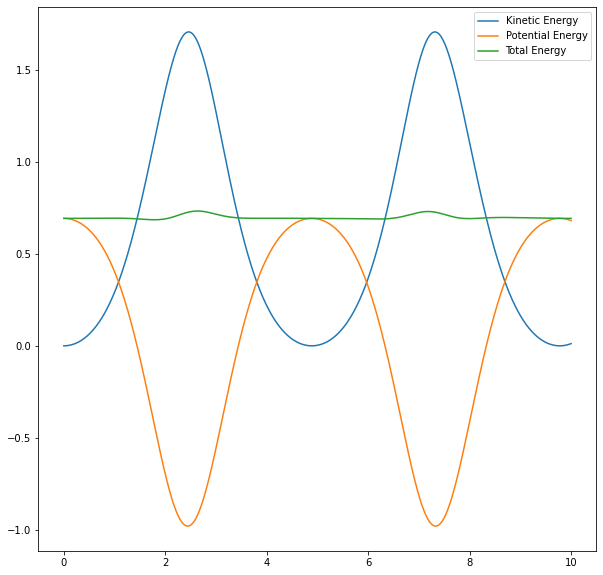

In [35]:
# Kinematic, potential, and total energy plot: No need to change
ke_hist = np.zeros(x_out.shape[1])
pe_hist = np.zeros(x_out.shape[1])
ts = np.arange(0, tf, dt)

for i, x in enumerate(x_out.T):
  ke_hist[i] = kinetic_energy(x, params)
  pe_hist[i] = potential_energy(x, params)

fig= plt.figure(figsize=(10,10))
plt.plot(ts, ke_hist, label='Kinetic Energy')
plt.plot(ts, pe_hist, label='Potential Energy')
plt.plot(ts, pe_hist+ke_hist, label='Total Energy')
plt.legend()
plt.show()

# Q.1.(d) [10 pts] Energy profile analysis

Explain the meaning of energy profiles by correlating them with the system's behavior.


Your answer: 

# **Q.2. The effect of damping** 

Now, let's consider the case when actuators operate like dampers. The first prismatic joint resists the joint motion with viscous friction efficiency of 0.5. Therefore, the formulation will be $f = -0.5\  \dot{x}$. For the second revolute joint, we will make the same viscous friction but with a coefficient of 10. Therefore, the formula is $\tau = -10\  \dot{\theta}$.  


# Q.2.(a) [15 pts] Dynamics simulation of the cart-pole with the dampers.

Complete the dynamics simulation code of the cart-pole system with the dampings explained above. 

In [36]:
def simulate_cartpole_damping(x0, params, tf=1.0, dt=0.01):
  m1, m2, I2, c, g = params
  num_step = int(np.floor(tf/dt));
  tspan = np.linspace(0, tf, num_step); 
  x_out = np.zeros((4,num_step));
  x_out[:,0] = x0;

  for i in range(num_step-1):
      # Fill your code: define the proper force and torque input 
      u =np.array([-0.5*x_out[:,i][2],-10*x_out[:,i][3]]).T


      # Fill your code: update the sequence of state (x_out) by utilizing the dynamcs function
      # Hint: use semi-implicit Euler integration
      q_ddot=dynamics(x_out[:,i],u,params)
      x_ddot=q_ddot[0]
      x_dot=x_out[:,i][2]+x_ddot*dt
      x=x_out[:,i][0]+x_dot*dt

      th_ddot=q_ddot[1]
      th_dot=x_out[:,i][3]+th_ddot*dt
      th=x_out[:,i][1]+th_dot*dt

      # [x,th,xdot,thdot]
      q_out=np.array([x,th,x_dot,th_dot]).T
      x_out[:,i+1]=q_out
  
  return x_out

In [37]:
x0 = np.array([0.0, np.pi/4, 0.0, 0.0]).T;
x_out_damped = simulate_cartpole_damping(x0, params, tf=tf, dt=dt)
anim = visualize_cartpole(x_out_damped[:2, :].T, num_frames=50)
plt.close()
HTML(anim.to_html5_video())

Streaming output truncated to the last 5000 lines.
0.6718043234430902
qddot:[ 0.00123391 -0.00467826]
0.6714227164844788
0.6714227164844788
qddot:[ 0.00123143 -0.0046775 ]
0.6710409925883417
0.6710409925883417
qddot:[ 0.00122896 -0.00467673]
0.670659151773839
0.670659151773839
qddot:[ 0.00122649 -0.00467597]
0.6702771940602013
0.6702771940602013
qddot:[ 0.00122403 -0.00467519]
0.6698951194667302
0.6698951194667302
qddot:[ 0.00122158 -0.00467442]
0.669512928012798
0.669512928012798
qddot:[ 0.00121913 -0.00467364]
0.6691306197178483
0.6691306197178483
qddot:[ 0.00121669 -0.00467286]
0.6687481946013955
0.6687481946013955
qddot:[ 0.00121425 -0.00467208]
0.6683656526830254
0.6683656526830254
qddot:[ 0.00121183 -0.00467129]
0.6679829939823952
0.6679829939823952
qddot:[ 0.00120941 -0.0046705 ]
0.6676002185192339
0.6676002185192339
qddot:[ 0.00120699 -0.00466971]
0.6672173263133416
0.6672173263133416
qddot:[ 0.00120458 -0.00466891]
0.6668343173845906
0.6668343173845906
qddot:[ 0.00120218 -0.00

# Q.2.(b) [15 pts] Energy plot

Plot the kinetic, potential, and total energy of system by refering the codes in Q.1.(c). 

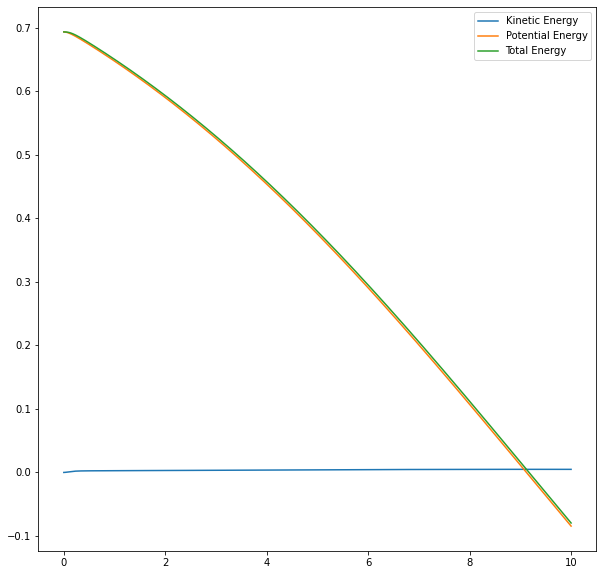

In [38]:
ke_hist = np.zeros(x_out_damped.shape[1])
pe_hist = np.zeros(x_out_damped.shape[1])
ts = np.arange(0, tf, dt)

# Fill our your code: 
for i, x in enumerate(x_out_damped.T):
  ke_hist[i] = kinetic_energy(x, params)
  pe_hist[i] = potential_energy(x, params)

fig= plt.figure(figsize=(10,10))
plt.plot(ts, ke_hist, label='Kinetic Energy')
plt.plot(ts, pe_hist, label='Potential Energy')
plt.plot(ts, pe_hist+ke_hist, label='Total Energy')
plt.legend()
plt.show()

# Q.2.(c) [10 pts] Energy profile analysis

Explain the meaning of energy profiles by correlating them with the system's behavior and the previous non-damping case.


Your answer: